# Background and Goal

## Background

So far, we have begun to explore some different distributions and get a handle on how we might demonstrate what the meaning of the Central Limit Theorem is with the help of Python and various helpful libraries such as `matplotlib`, `numpy`, and `scipy`. We are coding at a higher level of abstraction where we do not need to _build_ probability distributions.

## Goal

The goal of this notebook is to demonstrate the Central Limit Theorem.

## Imports

We begin by importing some modules and functions.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom, norm, poisson
import matplotlib.pyplot as plt

## Graphing Sums (almost like averages)
 
 Binomial Distribution is Counts, which are really sums, which is _almost_ like Averages.

_Disclaimer: Just like for everything in this course, but especially this. If it does not make 100% sense to you, then you should schedule time with me to review or ask questions in Slack._

With the Binomial Distribution, we can interpret it to have the following setup:
 1. We have a sample space $S$ that is comprised of a $1$ and a $0$.
 2. The probability of selecting $1$ is $p$, and the probability of selecting $0$ is $1-p$. This makes sense because the probabilities of the entire sample space is $1$.
 3. We can now create another sample space named $S^n$ that is the individual outcomes from sampling one item from $S$ $n$ times.
 4. Some examples of what is in $S^4$ are tuples like $(1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 1, 1)$.
 5. In our exercises, we explored a random variable that sums up the numbers in the tuple. 
 6. For example, using the examples above, we did mappings like this:
    - $(1, 0, 0, 0) \rightarrow 1$
    - $(0, 1, 0, 0) \rightarrow 1$
    - $(0, 0, 1, 1) \rightarrow 2$
 7. We then computed the probability for each outcome in $S^n$ and then, after grouping by all the values that the random variable takes on, we summed up the respective probabilities.
 8. But we could've done something slightly different, like taking the average of the numbers in each tuple instead of the sum.
 9. For example, using the same examples, we could do things like this:
    - $(1, 0, 0, 0) \rightarrow \frac{1}{4}$
    - $(0, 1, 0, 0) \rightarrow \frac{1}{4}$
    - $(0, 0, 1, 1) \rightarrow \frac{1}{2}$
 10. But, taking the average is just dividing by $n$. In this way, the distribution of the average has a squished shape as the distribution of the sum, and it is squished by a factor of $n$.
 11. So when we think of what the sample mean distribution is, we are just looking at the distribution of the average.

## Graph the counts. Still works. Why?

(17.2, 3.1311339798865205)


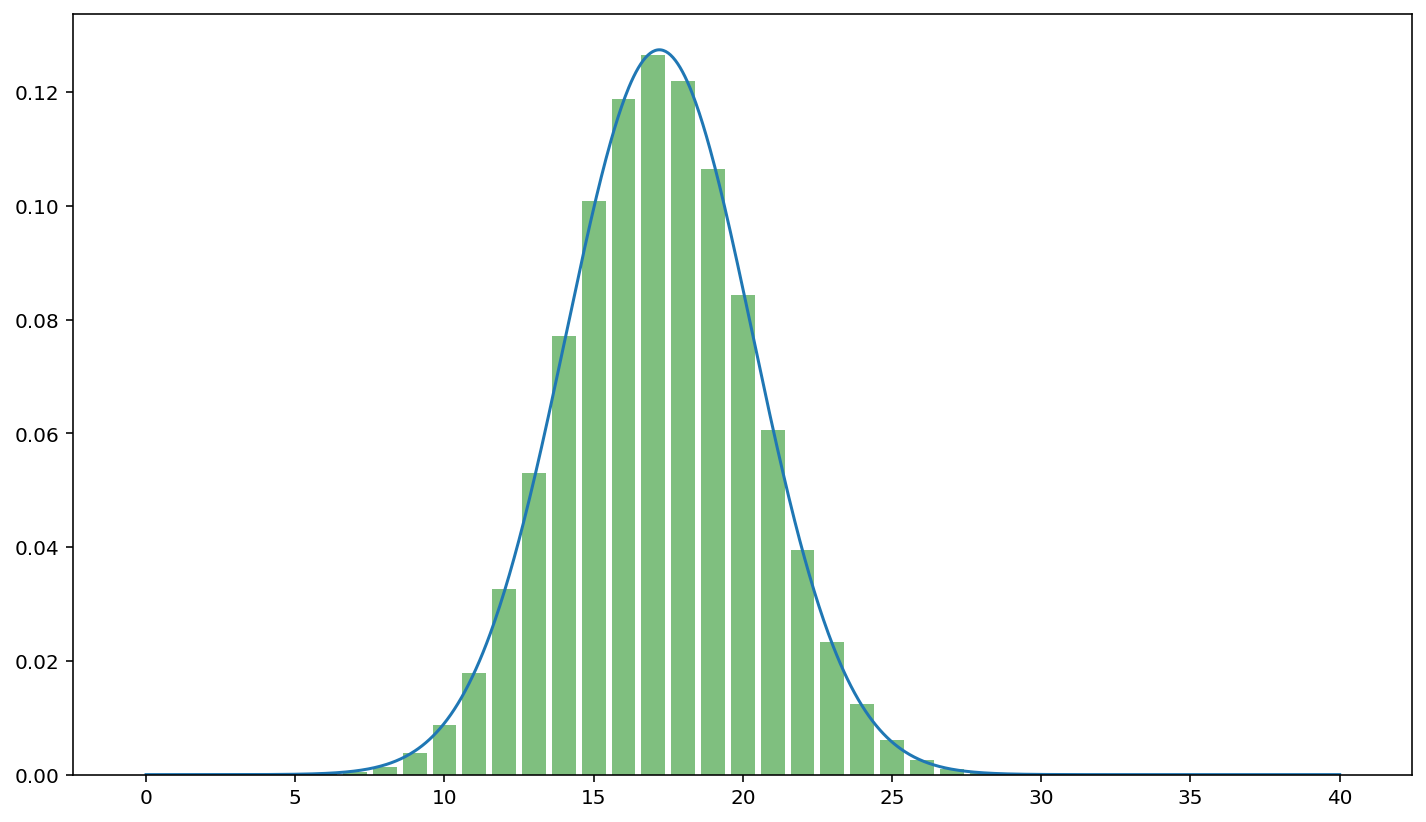

In [2]:
n, p = 40, .43 # (shape) parameters of the binomial distribution

binom_rv = binom(n, p)
mean, std = binom_rv.mean(), binom_rv.std()
normal_rv = norm(mean, std) #continuous random variable
print(normal_rv.args)

x_norm = np.linspace(0, n, num=1000)
y_norm = normal_rv.pdf(x_norm)

x_binom = np.arange(0, n + 1)
y_binom = binom_rv.pmf(x_binom)

plt.plot(x_norm, y_norm)
plt.bar(x_binom, y_binom, color='g', alpha=.5)
plt.show()

# Central Limit Theorem (CLT)

There are many variations, we stick with the standard one.

## CLT Assumptions
 0. Fix your sample size, this is the number of observations in a sample. Call this number $n$.
 1. Pick any distribution, it can be either discrete or continuous.
 2. Generate $n$ observations from the SAME distribution. This is a sample.
 3. Each of the observations are independent (i.e. it doesn't matter about the other observations in the sample when generating an observation).
 4. The sample mean of this sample is a random variable.

### Ensuring Assumptions is Important

5 years is a long time to run a _happiness_ survey, especially if the 5 years is between 2005 and 2010.

(I believe that, based on some research I've seen, that social media does decrease happiness.)

Keep in mind that Facebook became "mainstream" in 2007ish...  

(I believe that the presence of social media is a confounding variable)

# CLT Example: Poisson Distribution

The poisson distribution is a discrete probability distribution with one shape parameter, named $\lambda$ which is positive. (lambda was made with LaTeX)

$\lambda$ represents the rate across some period of time or space.

## Define a Poisson Distribution with `scipy`

In [3]:
RATE = 3
NUM_SAMPLES = 10**5
NUM_OBSERVATIONS = 100
NUM_BINS = 30

In [4]:
poisson_rv = poisson(RATE)

mean = poisson_rv.mean()
std = poisson_rv.std()

print(f"The mean of Poisson(rate={RATE}) is {mean}, and its variance is {round(std**2, 7)}.")

The mean of Poisson(rate=3) is 3.0, and its variance is 3.0.


## Graph a Poisson Distribution with `matplotlib`

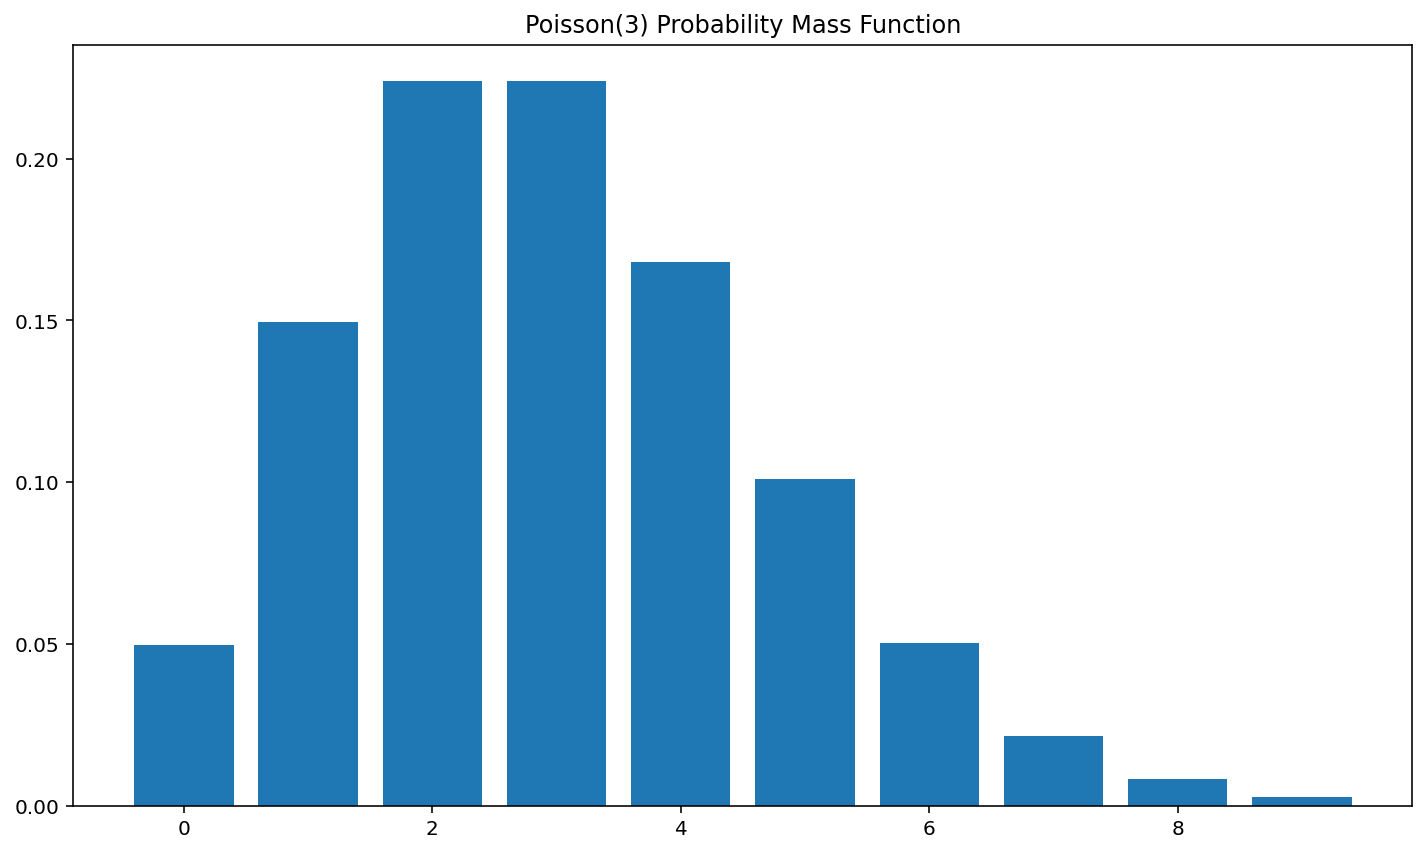

In [5]:
x_poisson = np.arange(10)
y_poisson = poisson_rv.pmf(x_poisson)

plt.bar(x_poisson, y_poisson)
_ = plt.title(f'Poisson({RATE}) Probability Mass Function')

## Create Samples, Observations, and Sample Means

In [6]:
all_observations = poisson_rv.rvs(size=NUM_OBSERVATIONS * NUM_SAMPLES)

In [7]:
all_observations = all_observations.reshape(NUM_OBSERVATIONS, NUM_SAMPLES)

In [8]:
samples = pd.DataFrame(all_observations, columns=[f'sample_{str(i).zfill(3)}' for i in range(NUM_SAMPLES)])
samples.head()

,sample_000,sample_001,sample_002,sample_003,sample_004,sample_005,sample_006,sample_007,sample_008,sample_009,...,sample_99990,sample_99991,sample_99992,sample_99993,sample_99994,sample_99995,sample_99996,sample_99997,sample_99998,sample_99999
0,3,3,4,3,3,4,2,5,3,2,...,3,3,1,2,1,1,0,1,1,4
1,4,6,3,5,1,4,1,8,5,2,...,2,3,6,2,2,4,3,5,1,4
2,4,3,4,1,7,3,2,7,1,5,...,3,3,3,3,0,1,2,5,2,5
3,5,3,1,3,0,2,2,2,5,5,...,4,5,1,2,4,3,5,4,1,6
4,0,1,2,0,4,3,2,3,5,2,...,4,1,5,1,3,1,1,3,2,4


### Compute Sample Means

In [9]:
sample_means = samples.mean()
sample_means

sample_000      3.17
sample_001      3.09
sample_002      2.91
sample_003      2.81
sample_004      2.70
                ... 
sample_99995    2.92
sample_99996    2.73
sample_99997    3.11
sample_99998    2.87
sample_99999    3.28
Length: 100000, dtype: float64

### Generate the histogram of sample means

In [10]:
counts, bins = np.histogram(sample_means, bins=NUM_BINS)
width = bins[1] - bins[0]

## Creating the corresponding normal distribution

1. Remember, this is an approximation of the distribution of sample means
2. Another word for "normal" is _Gaussian_.

In [11]:
x = np.linspace(bins.min(), bins.max(), num=1000)
norm_rv = norm(mean, std/np.sqrt(NUM_OBSERVATIONS))

## Graph the results

### Normalizing the area under the histogram

In [12]:
area_under_counts = (counts*width).sum()
normalized_heights = counts/area_under_counts

### Graphing the normal distribution and the empirical distribution of sample means

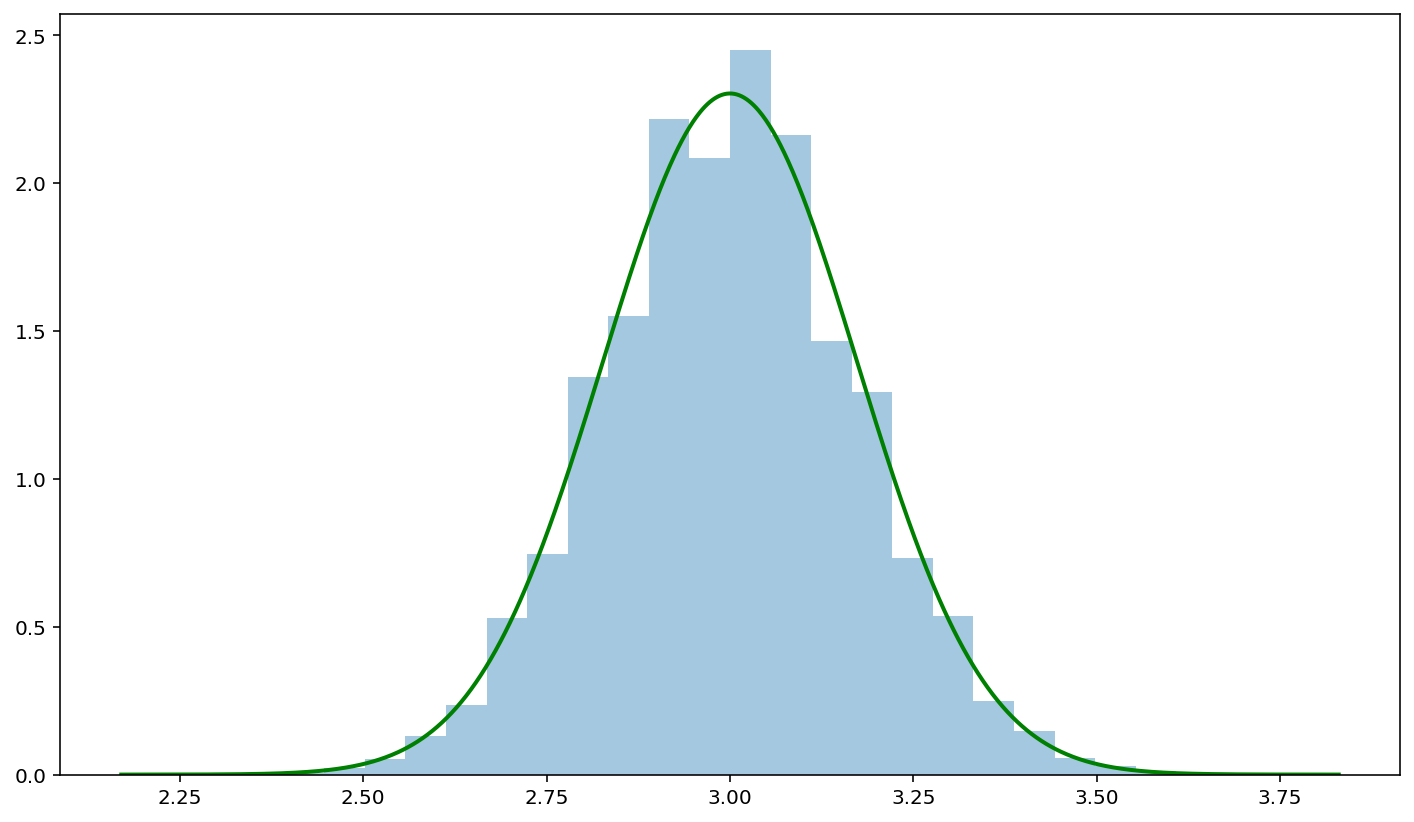

In [13]:
fig, ax = plt.subplots()
ax.hist(bins[:-1], bins, weights=normalized_heights, alpha=.4)
ax.plot(x, norm_rv.pdf(x), color='g', linewidth=2)

# CLT Example: Mixture Distribution

You can make a distribution from more than one other distributions.

## New Library! `statsmodels`

Look it up!

In [14]:
# https://github.com/statsmodels/statsmodels/blob/main/statsmodels/distributions/mixture_rvs.py
from statsmodels.distributions.mixture_rvs import mixture_rvs

## Create Mixture Distribution

In [15]:
weights = [5, 2]
probabilities = weights/np.sum(weights)
size = NUM_OBSERVATIONS * NUM_SAMPLES
samples = mixture_rvs(probabilities, size,
    dist=[norm, norm],
    kwargs=(
        dict(loc=10, scale=2),
        dict(loc=1, scale=8)
    )
)

## Compute Sample Means

In [16]:
samples = samples.reshape((NUM_OBSERVATIONS, NUM_SAMPLES))
sample_means = samples.mean(0)
sample_means

array([6.85712165, 7.29262655, 7.97958497, ..., 8.21148614, 8.00084396,
       7.48248929])

## Create 2 graphs side-by-side

 1. Graph the empirical mixture distribution from the samples generated
 2. Graph the sampling distribution of the sample mean with a Gaussian overlayed

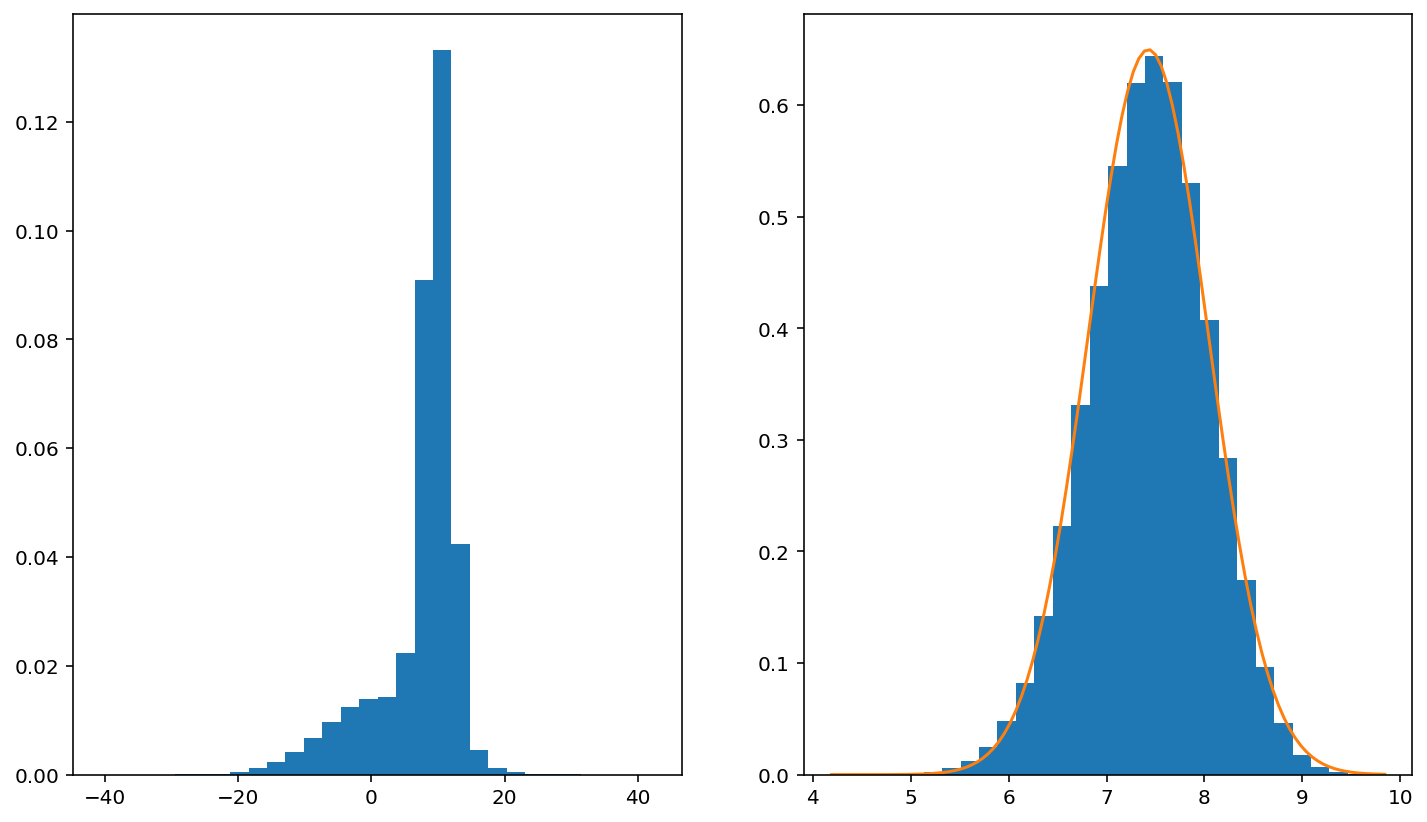

In [17]:
fig, (ax_1, ax_2) = plt.subplots(1, 2)

# graph empirical distribution (should look pretty close to the real thing)
sample_probabilities, sample_bins = np.histogram(samples, bins=NUM_BINS, density=True)
ax_1.hist(sample_bins[:-1], sample_bins, weights=sample_probabilities)

# graph sampling distribution of the sample mean
sample_mean_probabilities, sample_mean_bins = np.histogram(sample_means, bins=NUM_BINS, density=True)
ax_2.hist(sample_mean_bins[:-1], sample_mean_bins, weights=sample_mean_probabilities)

# graph normal approximation
x = np.linspace(sample_mean_bins.min(), sample_mean_bins.max(), num=100)
ax_2.plot(x, norm.pdf(x, samples.mean(), samples.std()/np.sqrt(NUM_OBSERVATIONS)))

# Conclusion

In this notebook, we have created visuals demonstrating the Central Limit Theorem. Basically, it is always the case that the sampling distribution of the sample mean is a Gaussian.